### DIABETES PREDICTION

### The following classification algorithms are performed in Python for Diabetes Prediction
1. Logistic Regression
2. KNN Classifier
3. Decision Tree
4. Naive Bayes Classifier
5. Support Vector Machine

IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### Reading the Dataset 

In [2]:
df=pd.read_csv('diabetes_dataset.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

### Shape of the Dataset

In [3]:
df.shape

(768, 9)

We can see that there are 768 instances and 9 variables in the data set

### Info about the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe(include='all').T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

### Checking the null values in dataset

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Checking The Duplicates

In [7]:
df.duplicated().sum()

0

### Checking the Correlation

In [8]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [9]:
s=df.select_dtypes(include="number").corr()

<Axes: >

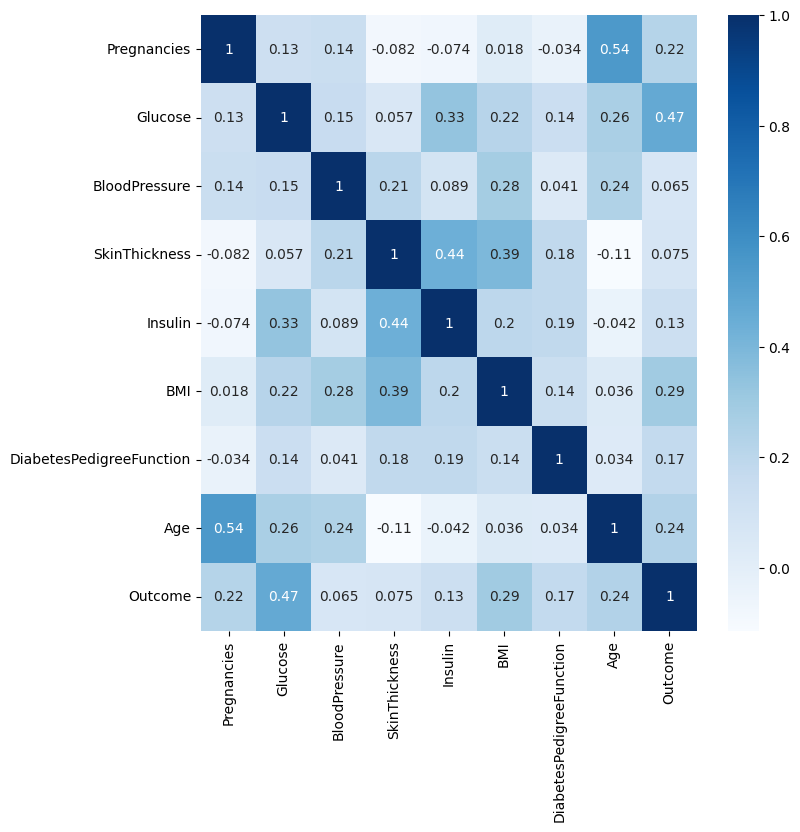

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

### MULTIVARIATE ANALYSIS

<Figure size 1500x1500 with 0 Axes>

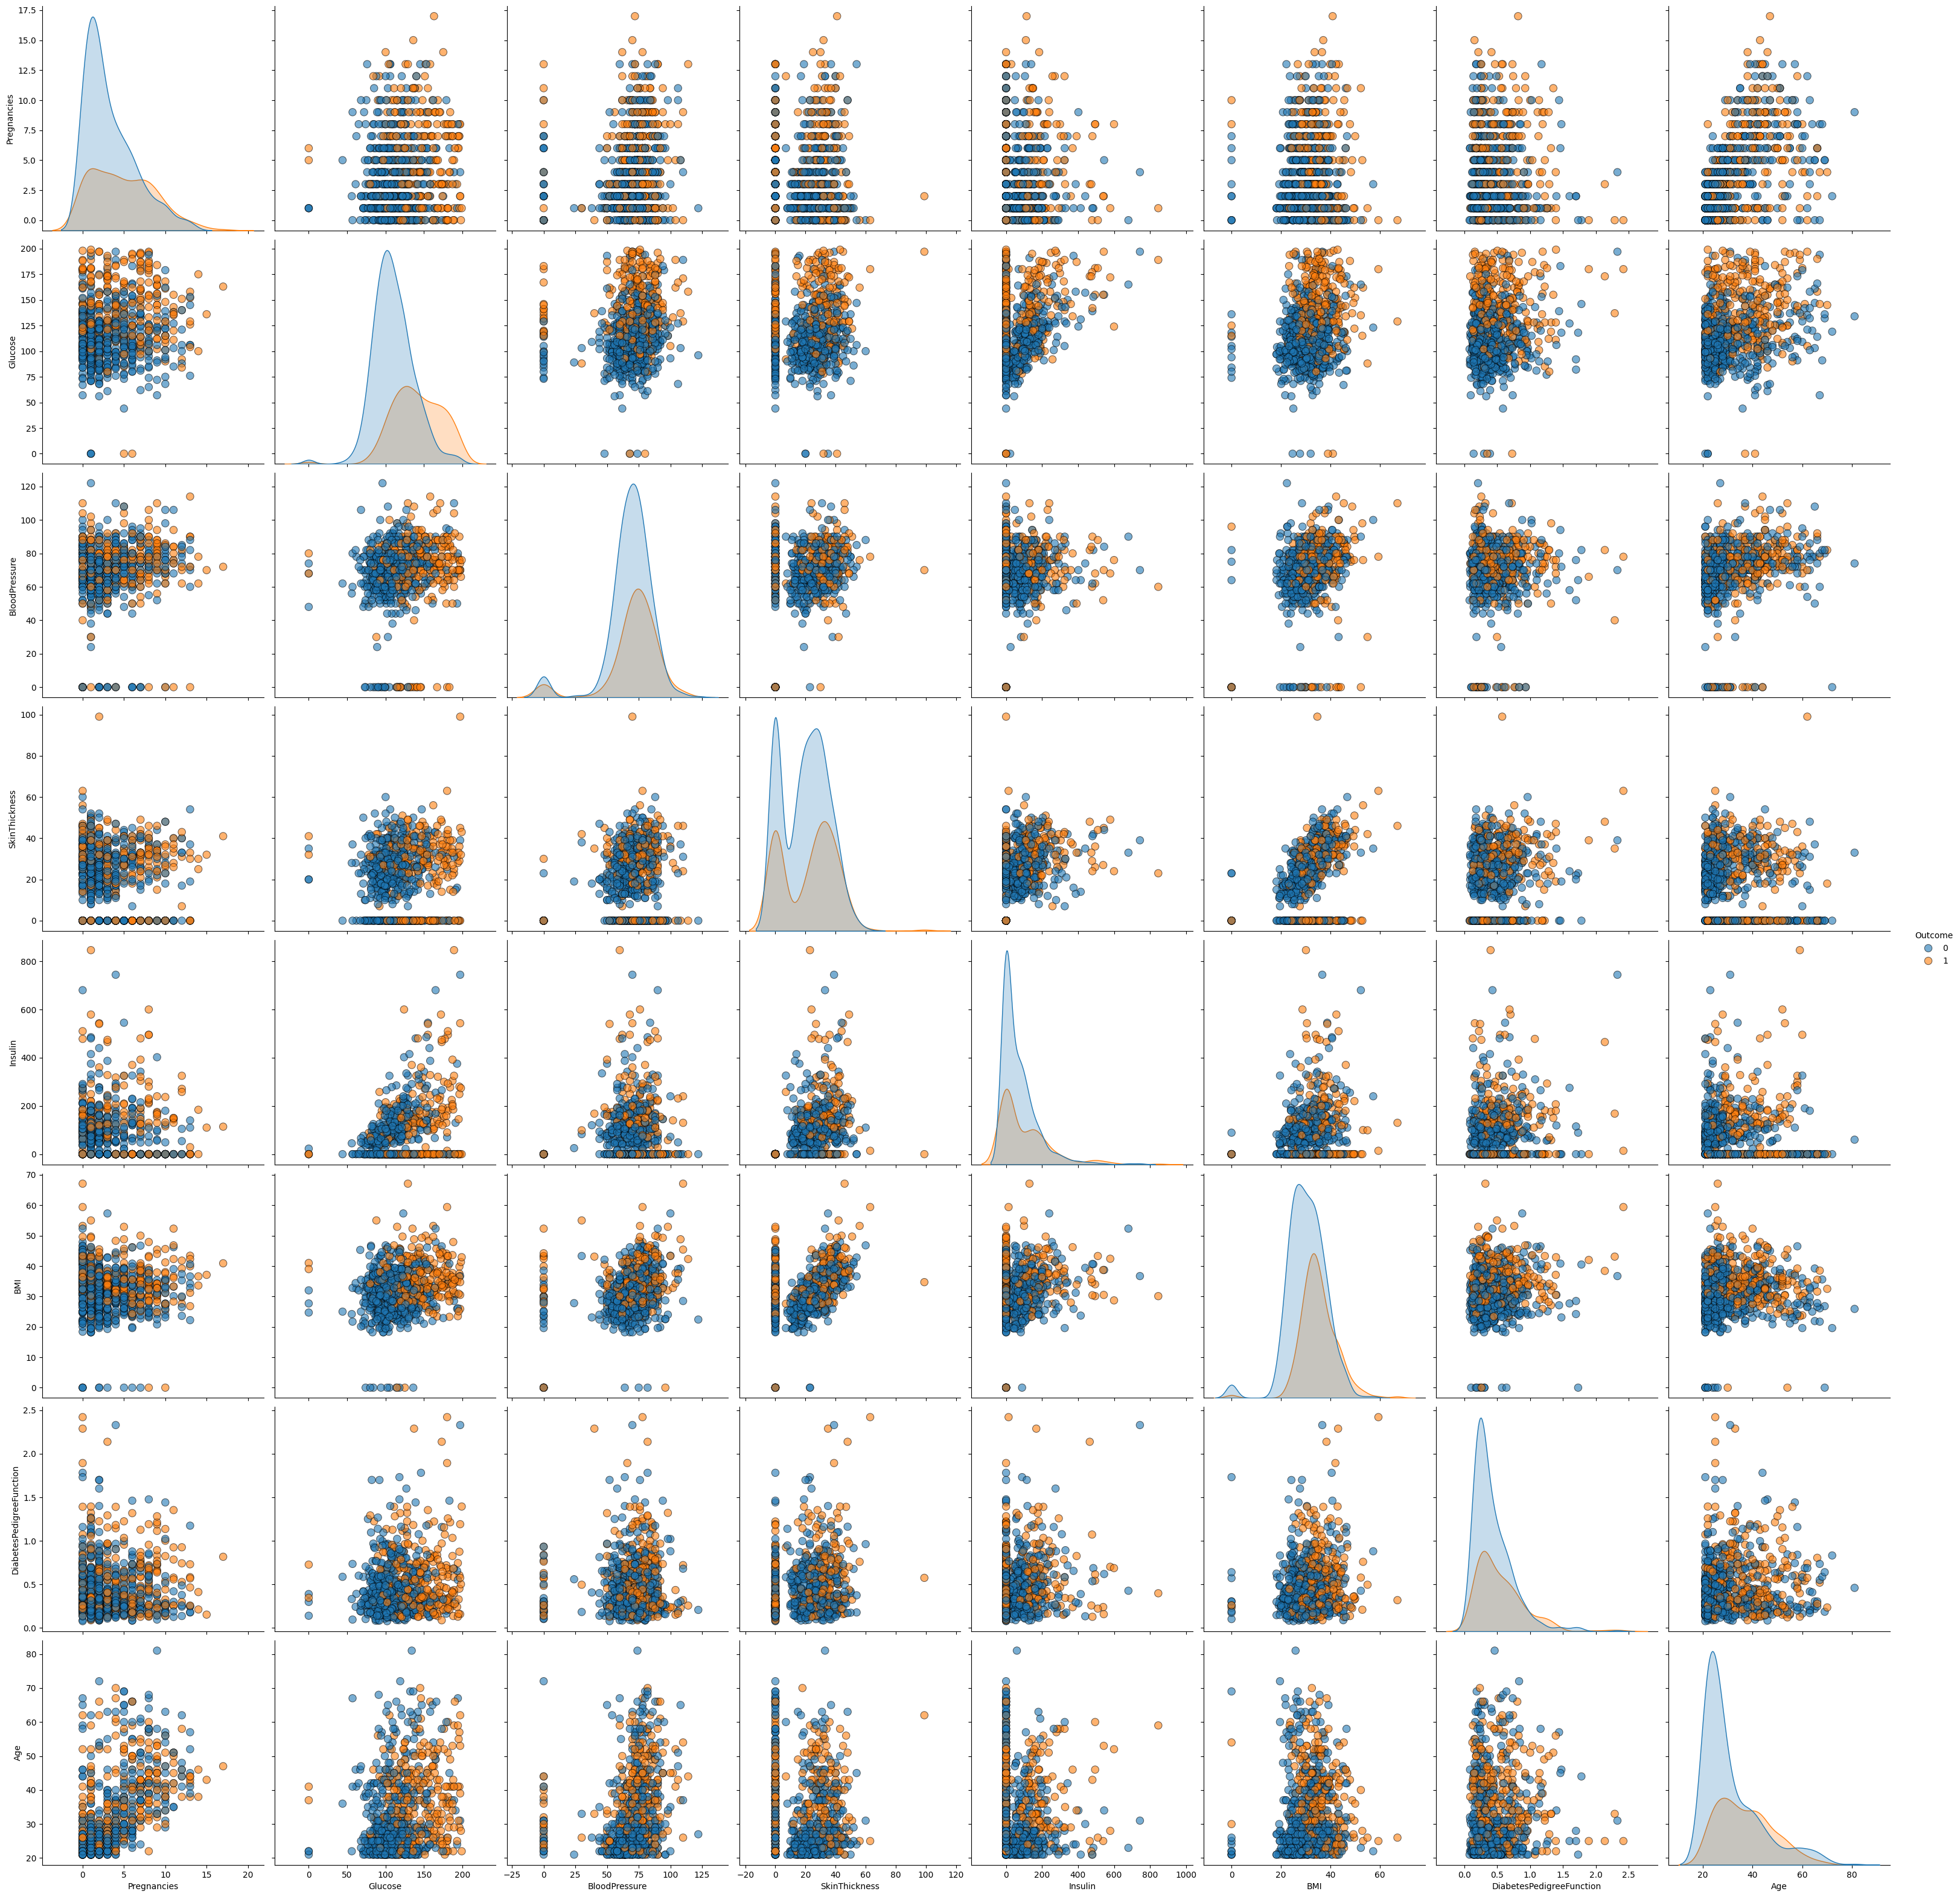

In [11]:
plt.figure(figsize=(15,15))
plt.suptitle('Multivariate Analysis', fontsize=20, fontweight='bold')
sns.pairplot(df, diag_kind = 'kde',hue='Outcome', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'},size=4)

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### REG-PLOT

In [13]:
num_col=[feature for feature in df.columns if df[feature].dtype != '0']
num_col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

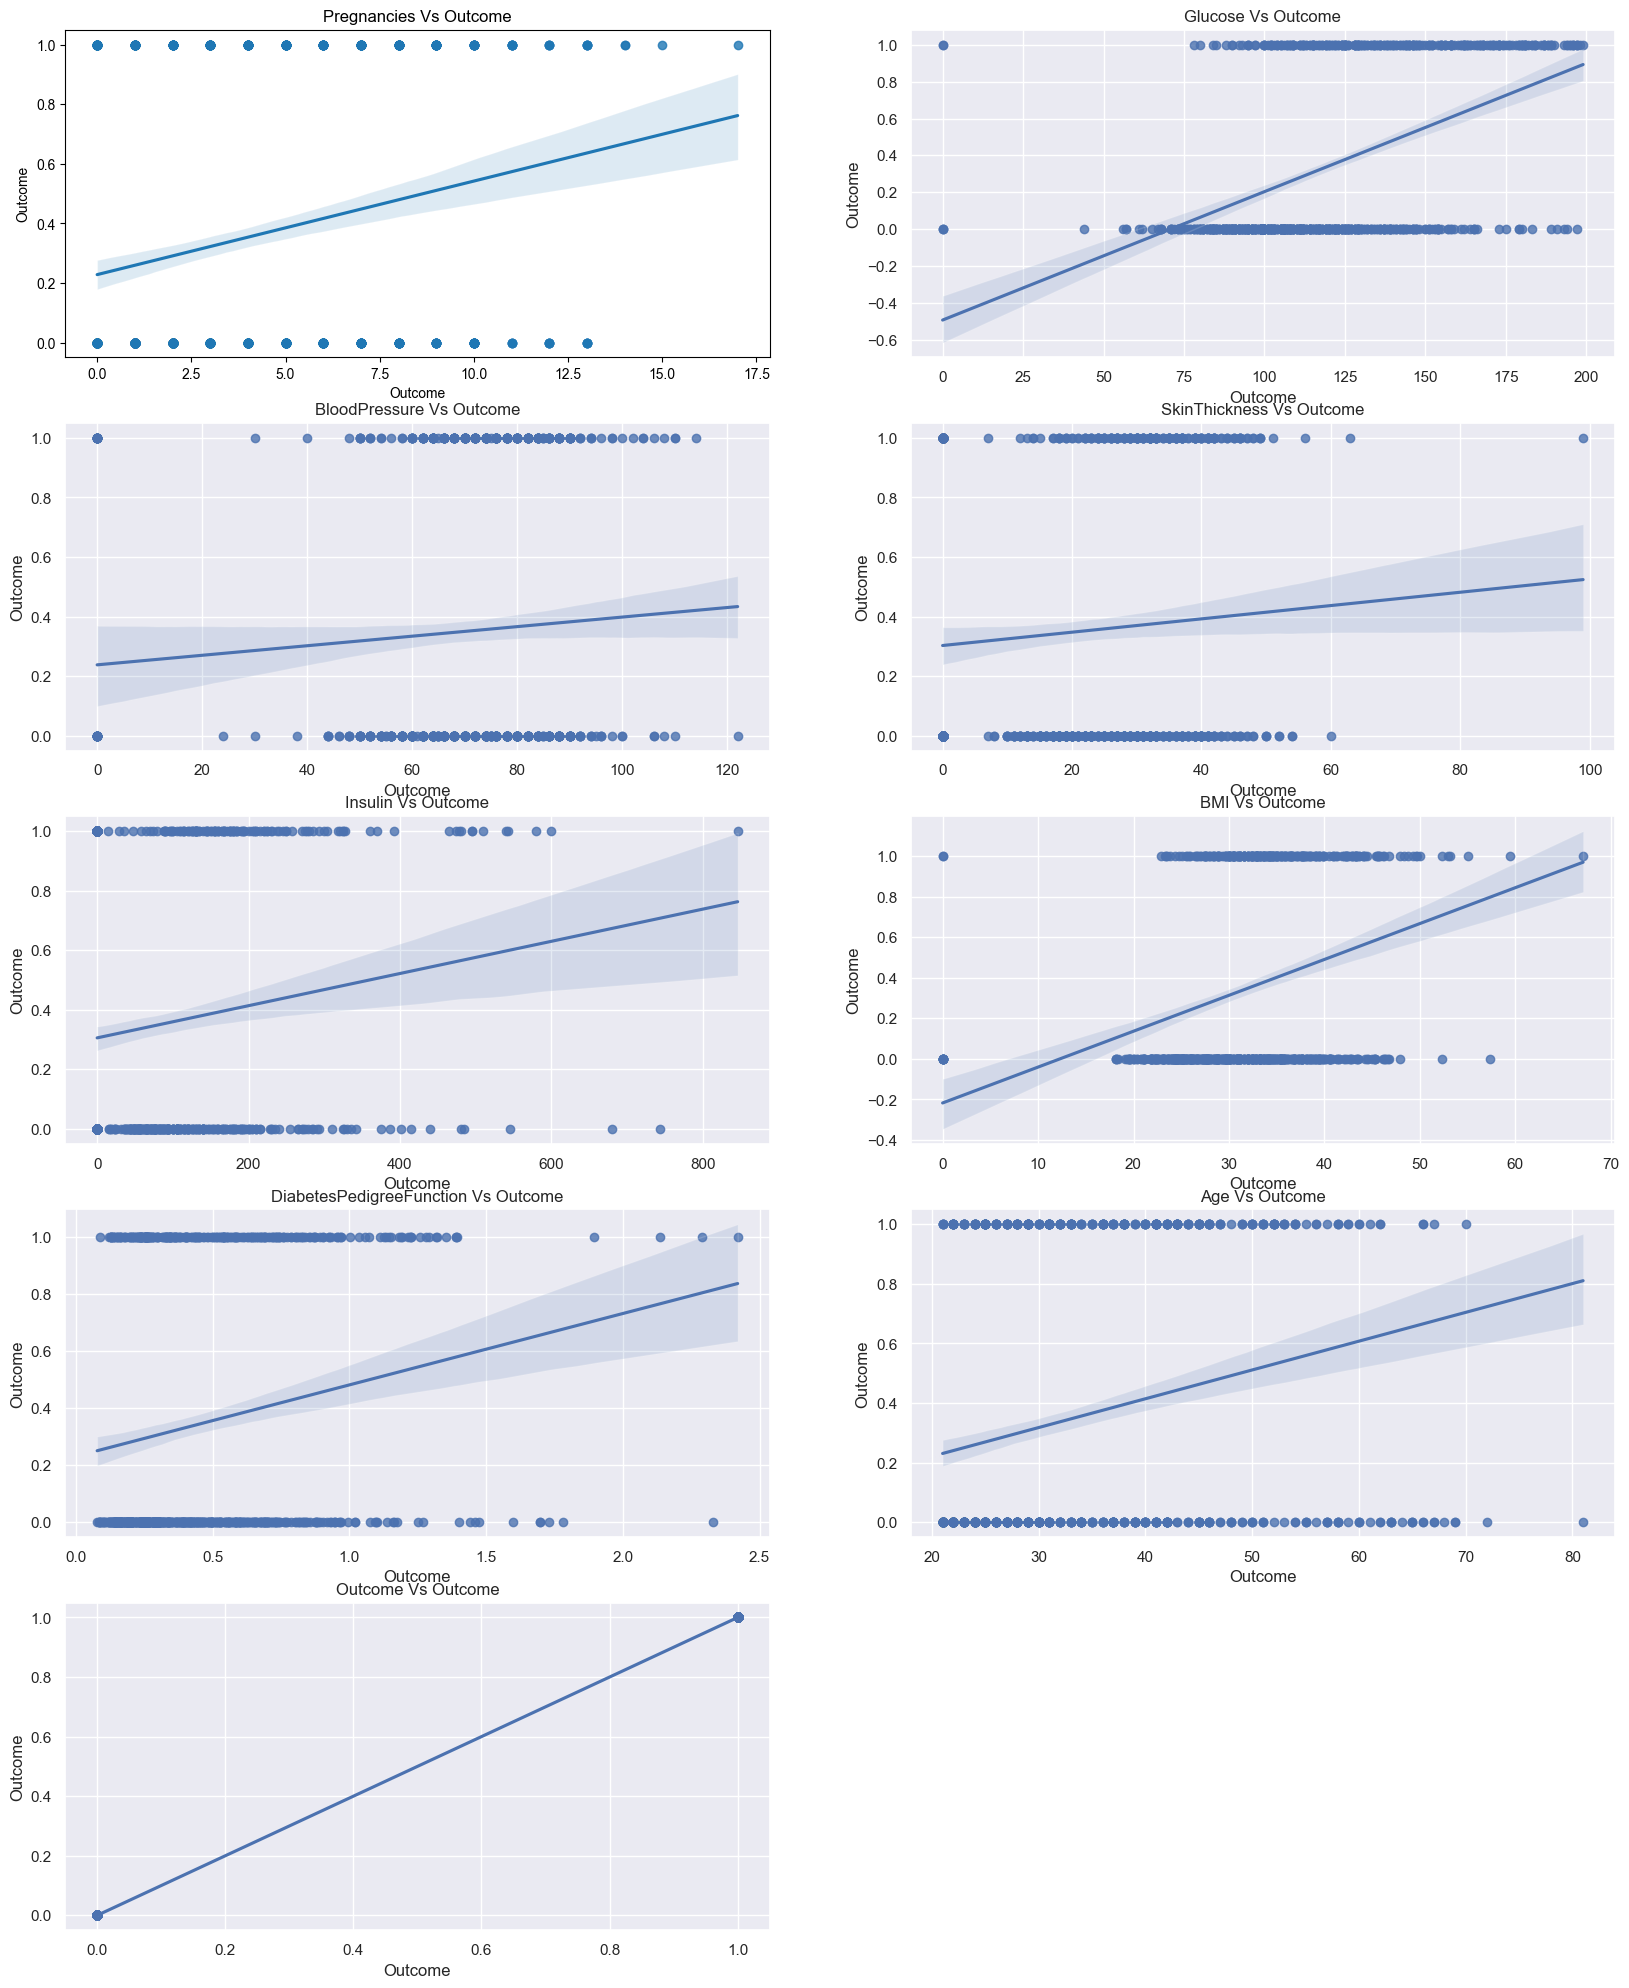

In [14]:
plt.figure(figsize=(20,40))
for i in enumerate(num_col):
    plt.subplot(8,2,i[0]+1)
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(data=df,x=i[1],y='Outcome')
    plt.xlabel('Outcome')
    plt.title('{} Vs Outcome'.format(i[1]))

### Checking the Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

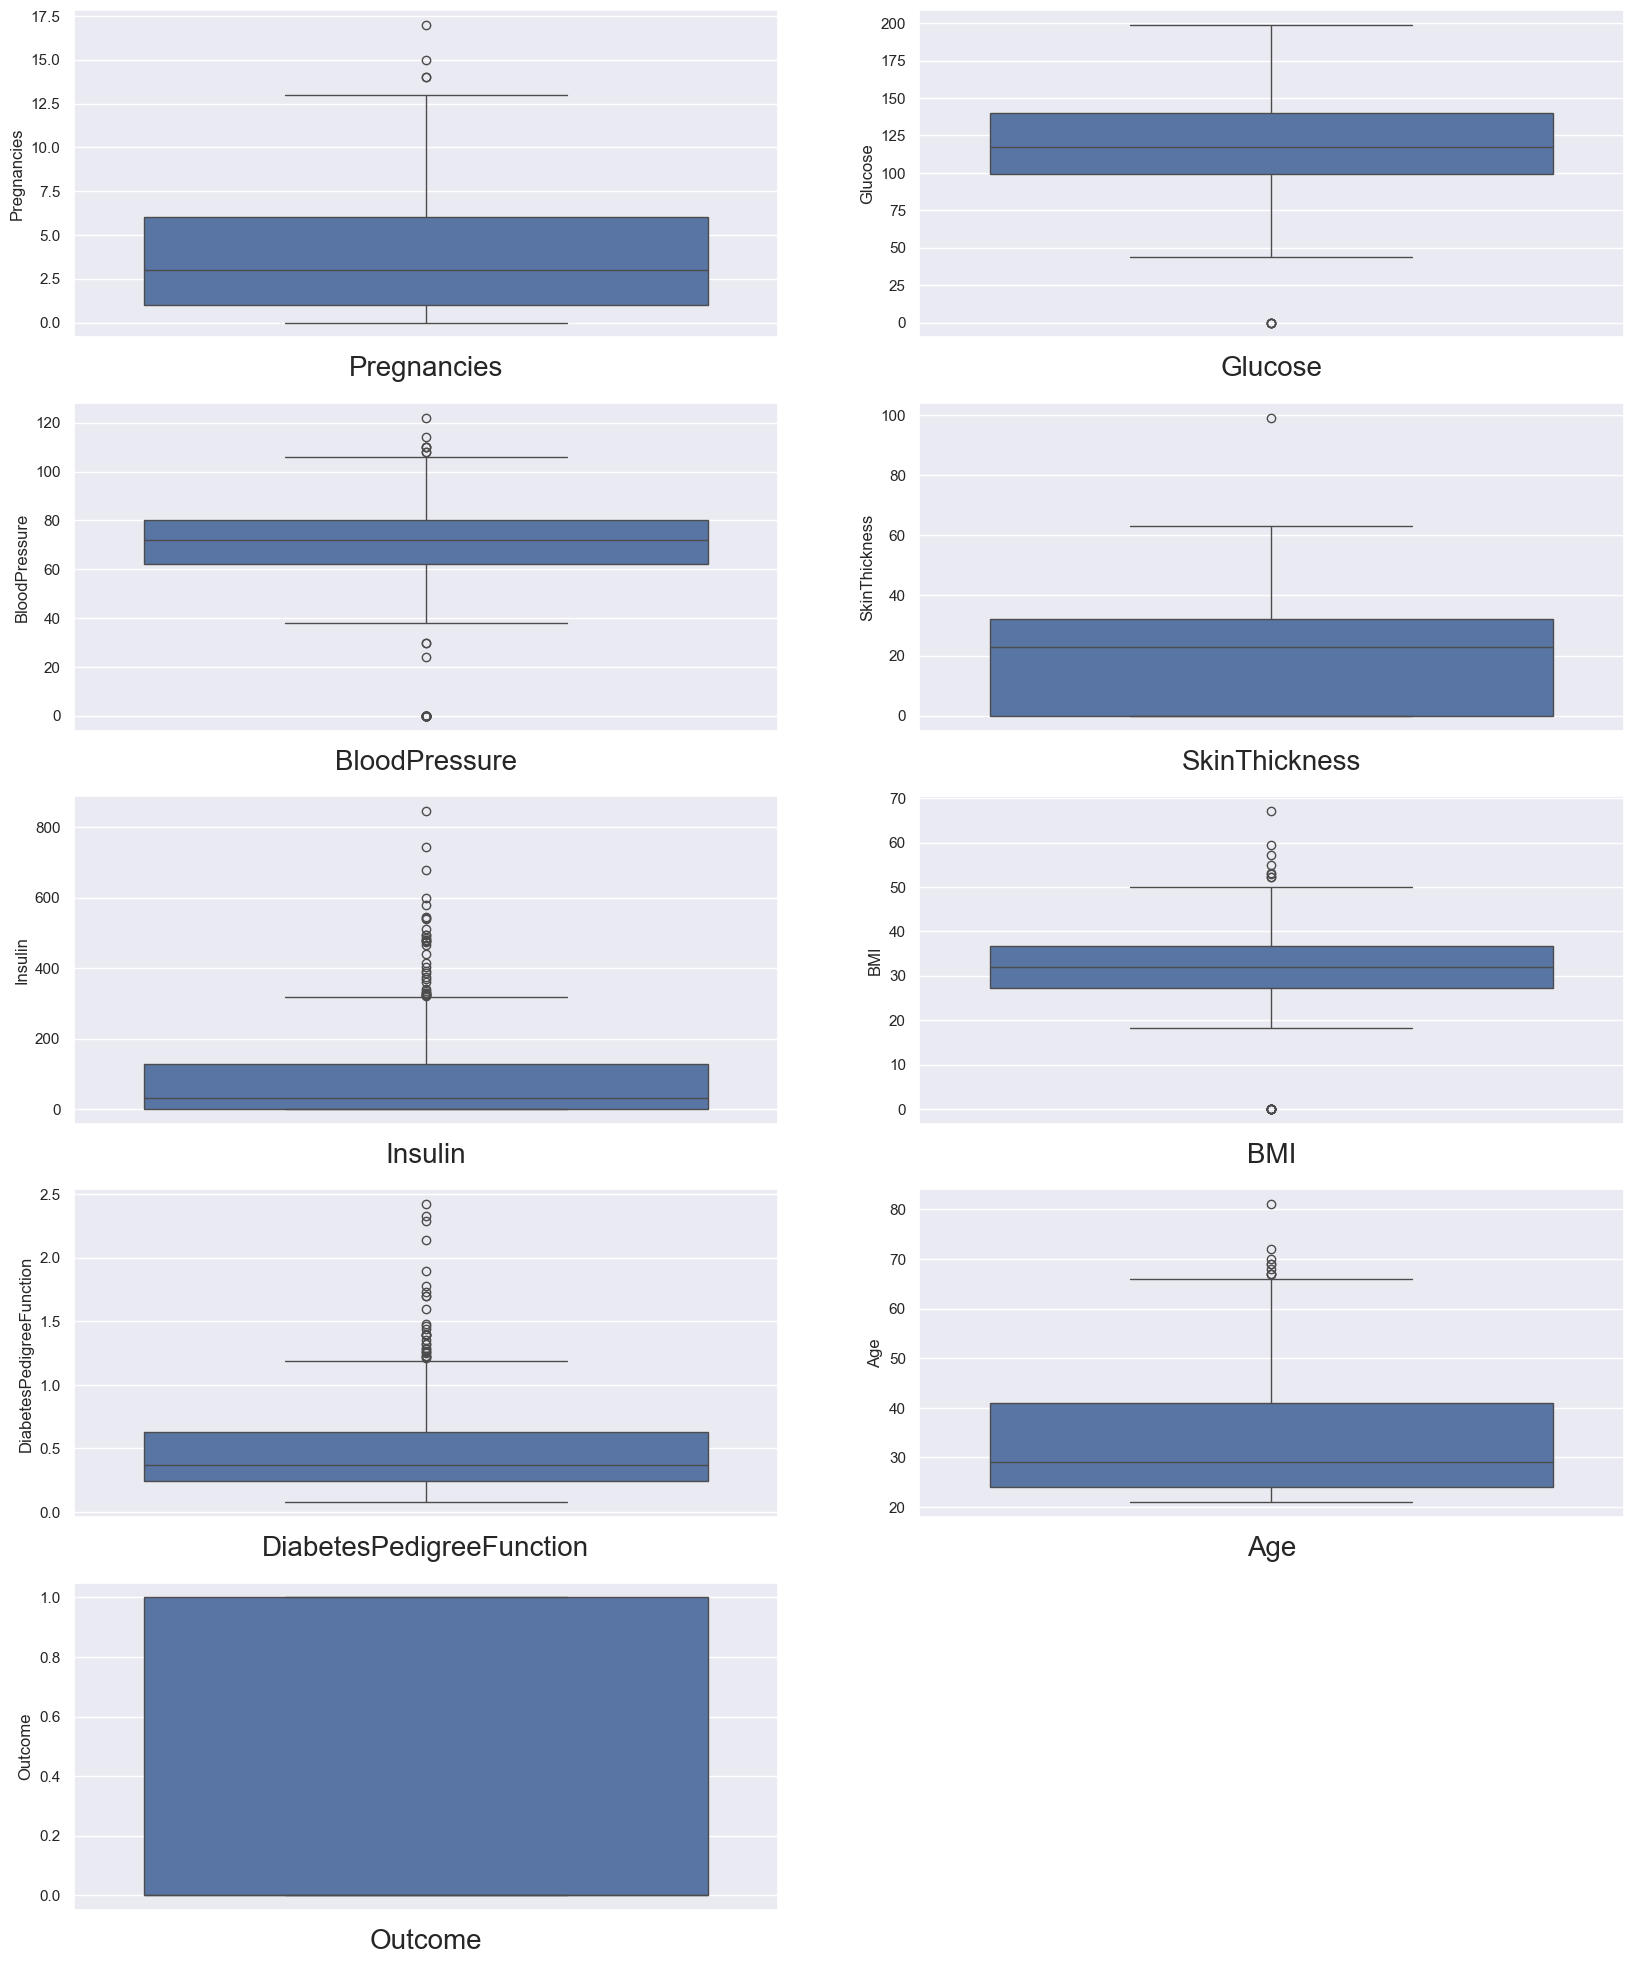

In [15]:
# Boxplot to identify the outliers
plt.figure(figsize=(20,40),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(8,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.show

### Observation:

The above boxplots confirm that there are lot of outliers in these variables.

 Features - Pregnancies , Glucose, BloodPressure, SkinThickness, Insulin,BMI, DiabetesPedigreeFunction and Age has Outliers.

### Dropping the outliers

In [16]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [17]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

### Checking the outliers after dropping all the outliers

<function matplotlib.pyplot.show(close=None, block=None)>

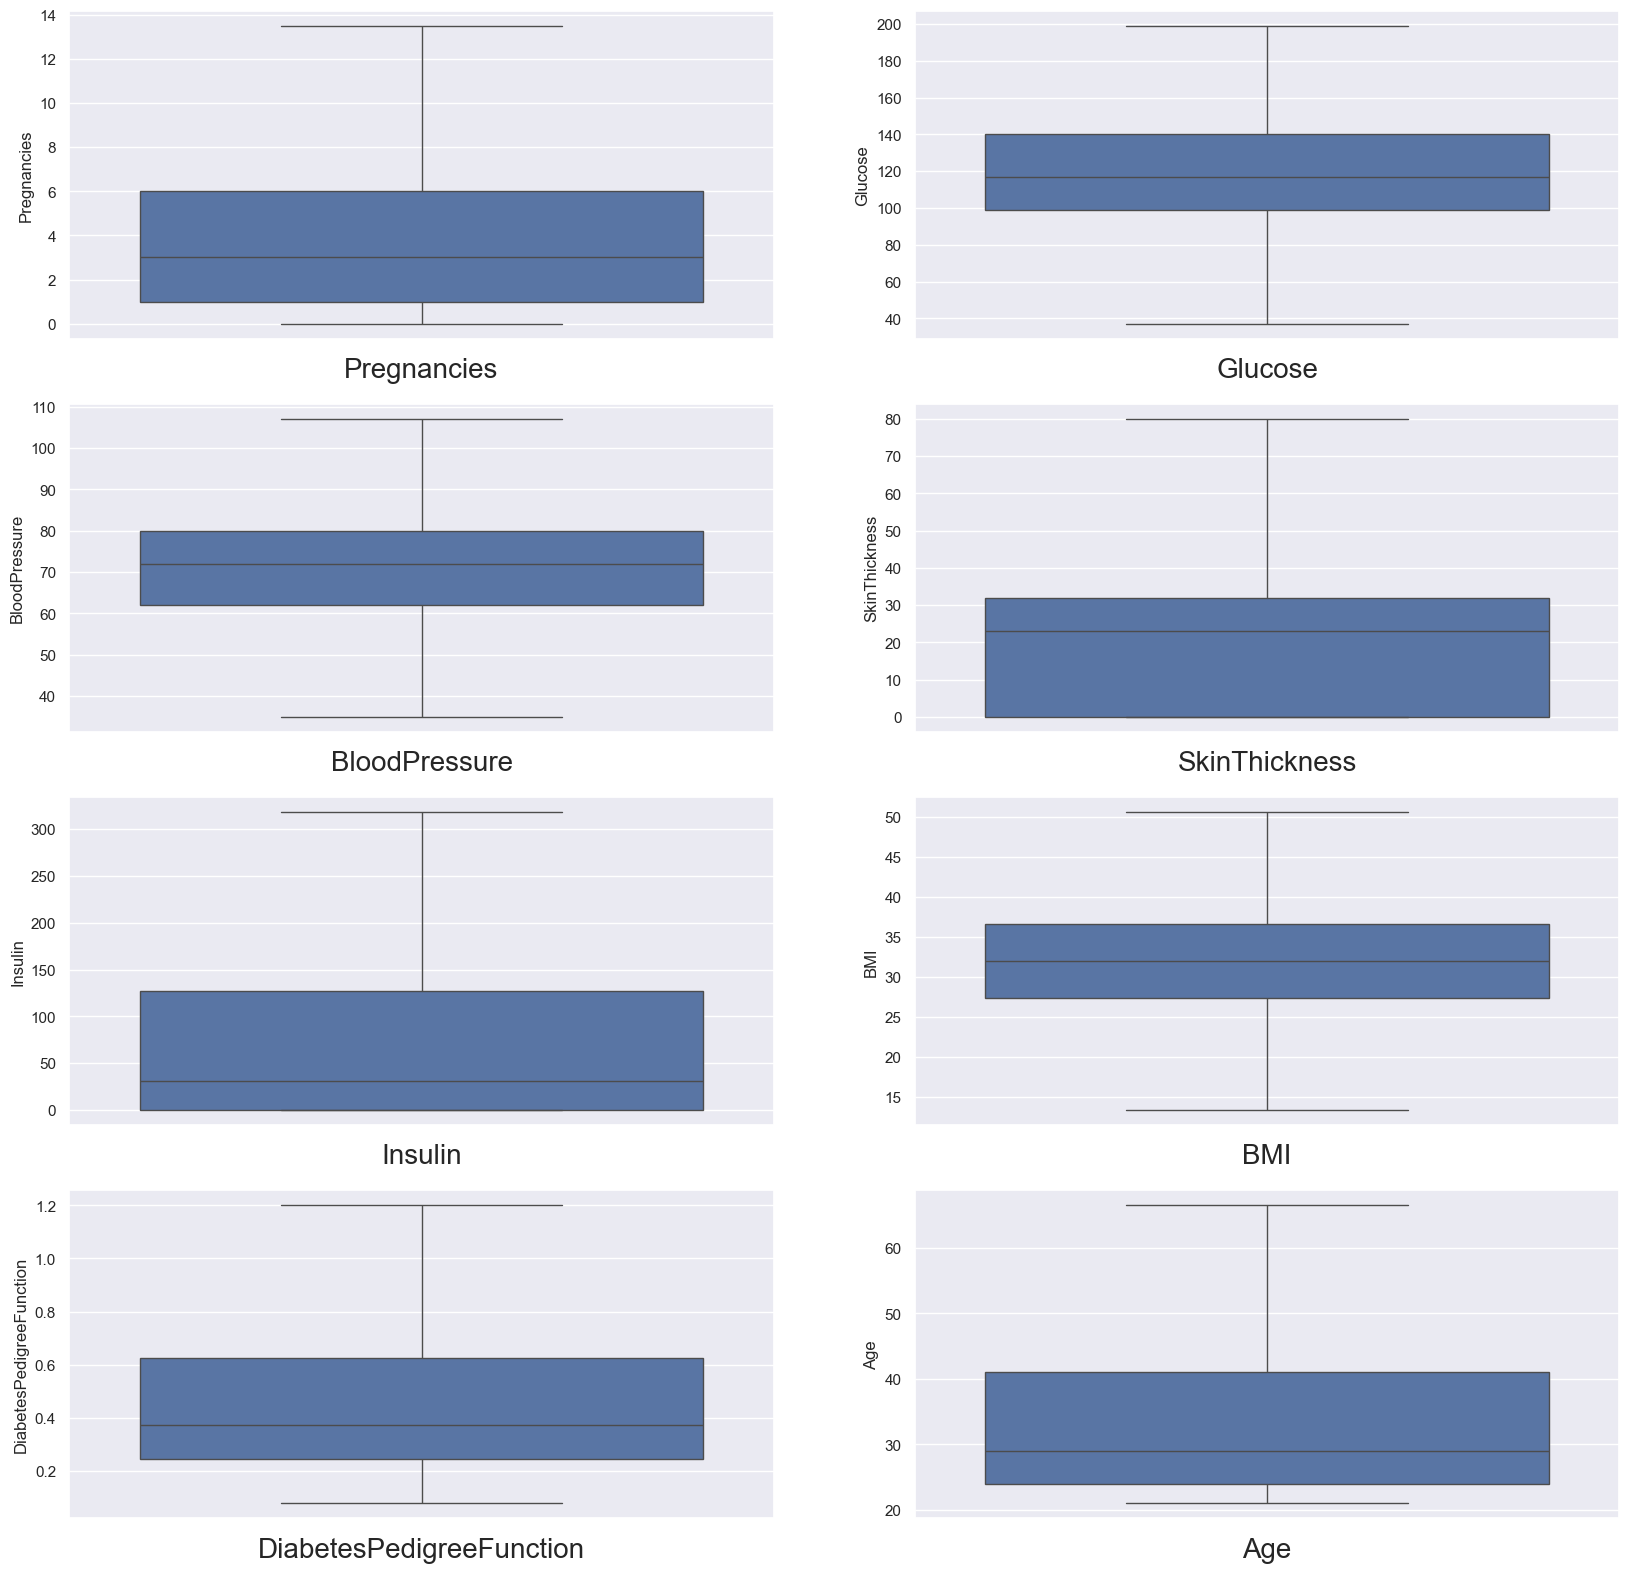

In [18]:
plt.figure(figsize=(20,40),facecolor='white')
plotnumber=1

for column in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']:
    if plotnumber<=9:
        ax=plt.subplot(8,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.show

### Observation:


There is no outliers in any of the features in dataset.


### Checking the distribution of the features
Now, I will plot the distplot,histogram to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do Extreme Value Analysis.

<function matplotlib.pyplot.show(close=None, block=None)>

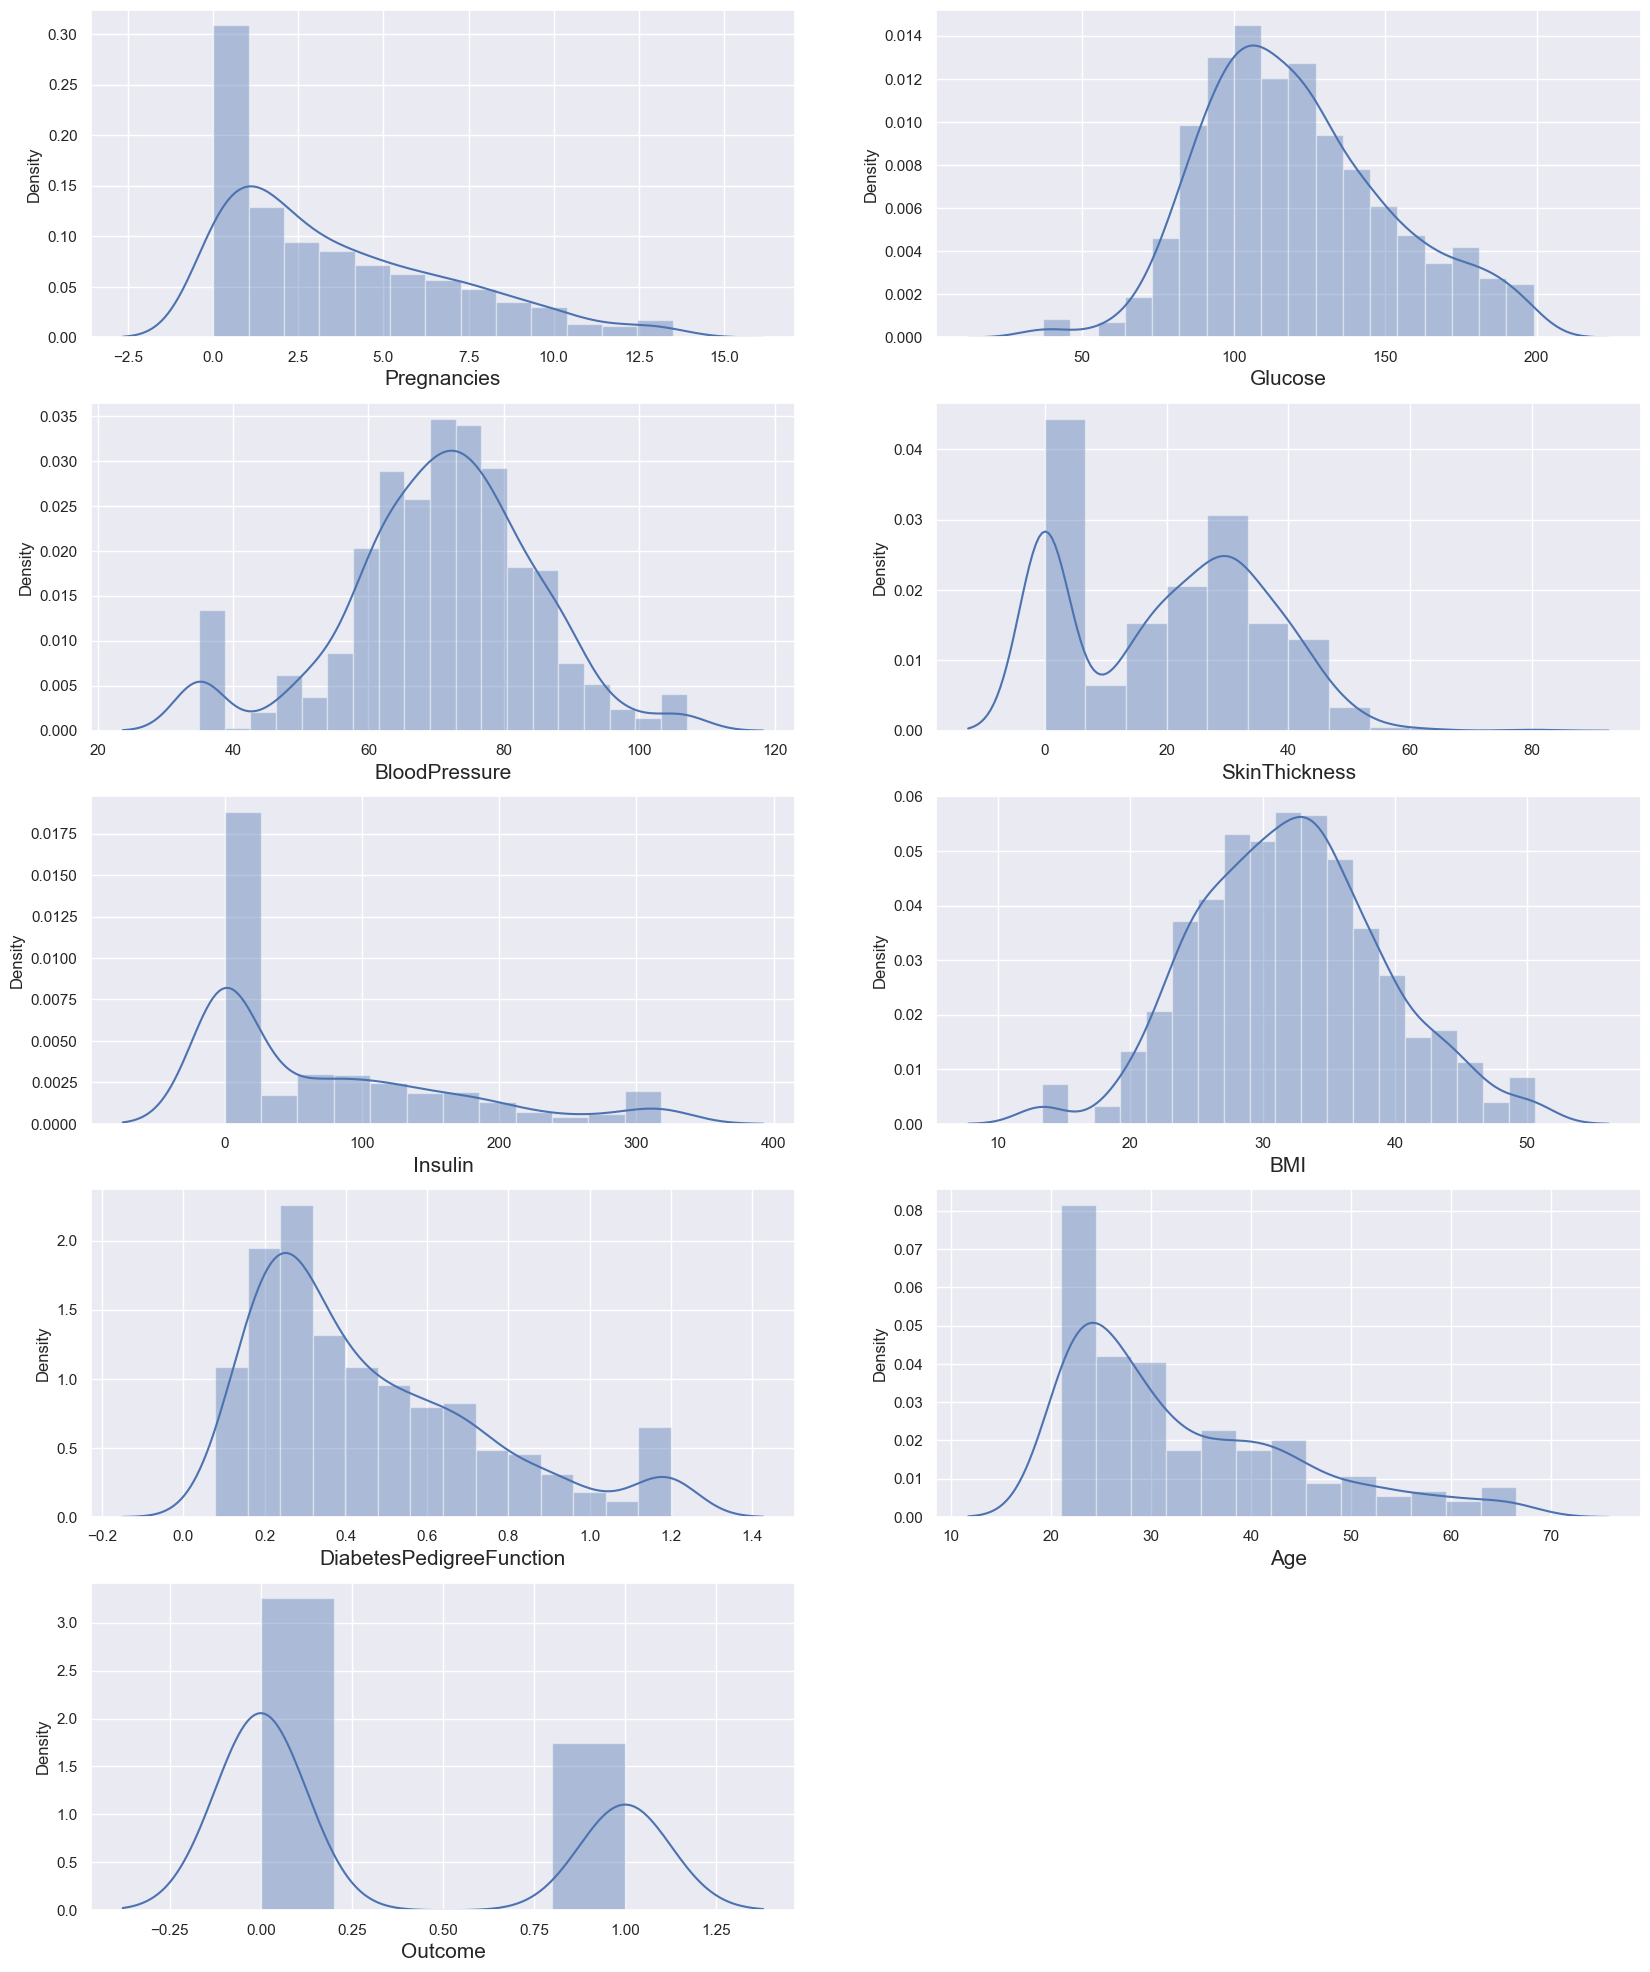

In [19]:
plt.figure(figsize=(20,40),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=10:
        ax=plt.subplot(8,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)

    plotnumber+=1
plt.show

### Checking the Normality

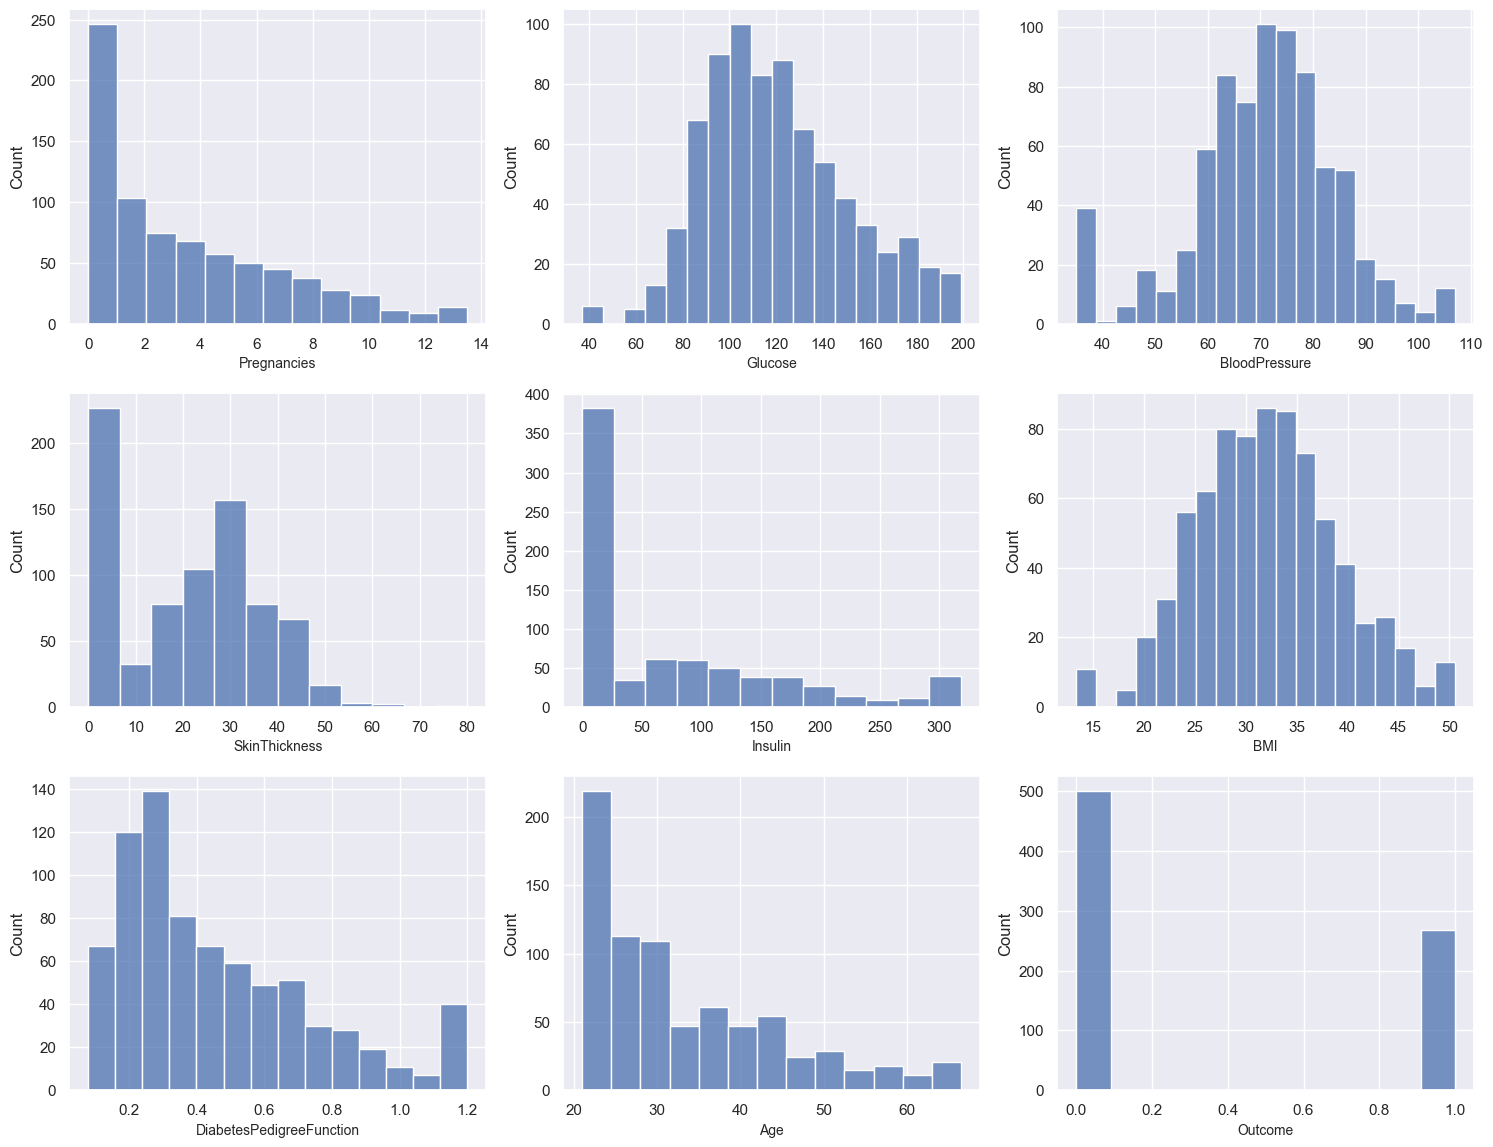

Pregnancies                 0.853962
Glucose                     0.417946
BloodPressure              -0.406036
SkinThickness               0.026663
Insulin                     1.173898
BMI                         0.135809
DiabetesPedigreeFunction    1.024428
Age                         1.067170
Outcome                     0.635017
dtype: float64


In [20]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1
for i in df.columns:
 ax = plt.subplot(4,3,plotnumber)
 sns.histplot(df[i])
 plt.xlabel(i,fontsize=10)
 plotnumber +=1
plt.tight_layout()
plt.show()
print(df.skew())

### Converting features into Normal distribution

In [21]:
# Box-Cox Transformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
df_trans1 = pd.DataFrame(pt.fit_transform(df+0.000001),columns=df.columns)

### After Transformation

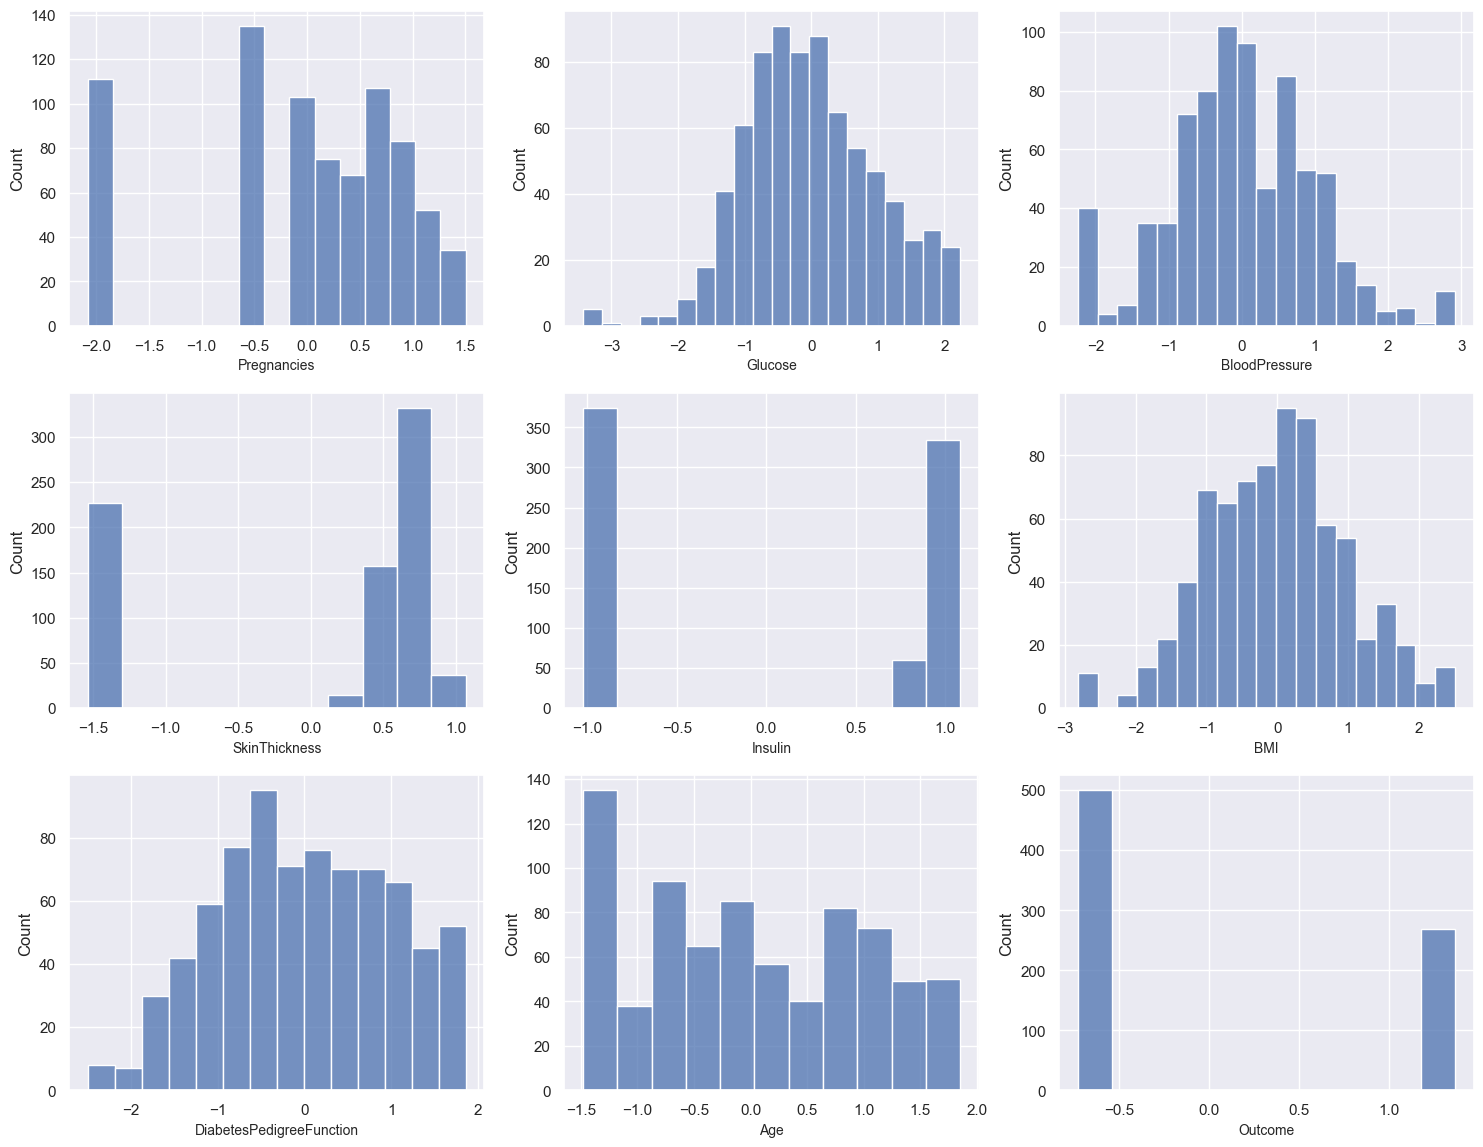

Pregnancies                -0.955525
Glucose                     0.013618
BloodPressure               0.024371
SkinThickness              -0.854648
Insulin                    -0.043866
BMI                         0.009422
DiabetesPedigreeFunction   -0.003659
Age                         0.145747
Outcome                     0.635017
dtype: float64


In [22]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1
for i in df.columns:
 ax = plt.subplot(4,3,plotnumber)
 sns.histplot(df_trans1[i])
 plt.xlabel(i,fontsize=10)
 plotnumber+=1
plt.tight_layout()
plt.show()
print(df_trans1.skew())

### Skewness

In [23]:
from scipy.stats import skew

Pregnancies
0.8522929480775797
Glucose
0.41712947618943413
BloodPressure
-0.4052420594003274
SkinThickness
0.026610876128333412
Insulin
1.1716041064979745
BMI
0.13554320291395314
DiabetesPedigreeFunction
1.022425881265123
Age
1.0650848744423982
Outcome
0.6337757030614577


<function matplotlib.pyplot.show(close=None, block=None)>

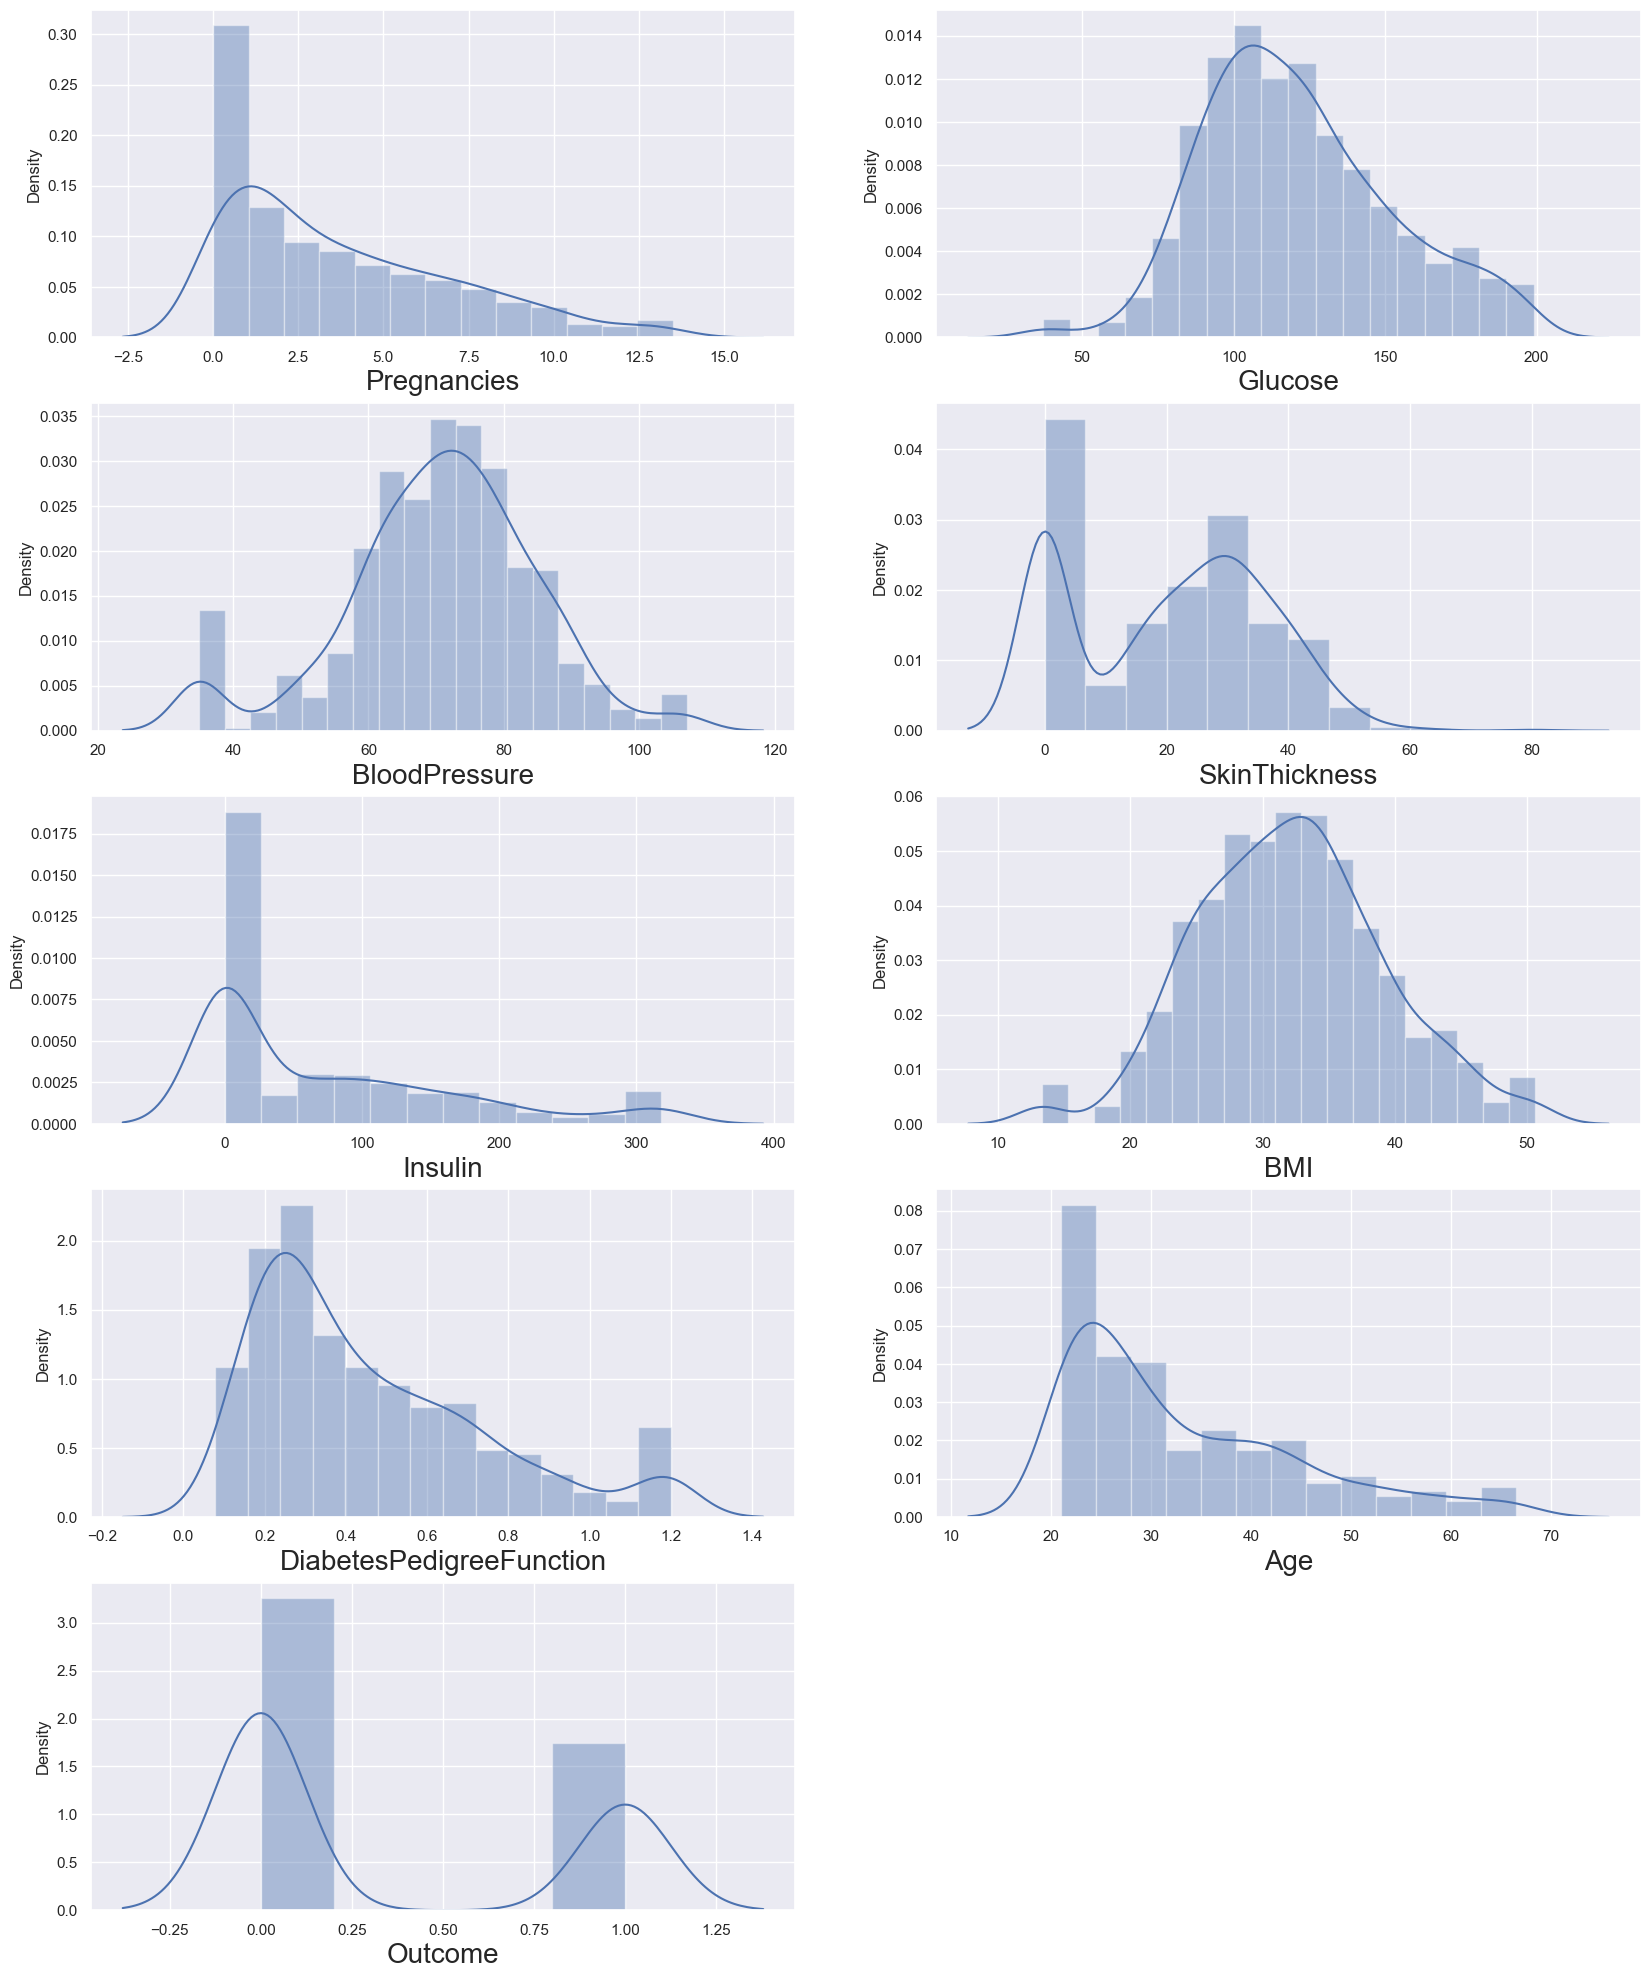

In [24]:
plt.figure(figsize=(20,40),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(8,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        print(column)
        print(skew(df[column]))

    plotnumber+=1
plt.show

In [25]:
df['DiabetesPedigreeFunction'] = np.sqrt(df['DiabetesPedigreeFunction'])
skew(df['DiabetesPedigreeFunction'])

0.5204812483603616

In [26]:
df['Insulin'] = np.sqrt(df['Insulin'])
skew(df['Insulin'])

0.40696254015104927

In [27]:
df['Age'] = np.sqrt(df['Age'])
skew(df['Age'])

0.8125443518431849

### Split data into separate training and test set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=df.iloc[:,0:8]
y=df.iloc[:,-1]


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [32]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

### LOGISTIC REGRESSION

### Introduction to Logistic Regression

When data scientists may come across a new classification problem, the first algorithm that may come across their mind is Logistic Regression. It is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. Logistic Regression is also called Logit Regression. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems

### Logistic Regression intuition

In statistics, the Logistic Regression model is a widely used statistical model which is primarily used for classification purposes. It means that given a set of observations, Logistic Regression algorithm helps us to classify these observations into two or more discrete classes. So, the target variable is discrete in nature.

### Assumptions of Logistic Regression

The Logistic Regression model requires several key assumptions. These are as follows:-
1.
Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.2.

It requires the observations to be independent of each other. So, the observations should not come from repeated measurement3.s.

Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each 

4.Logistic Regression model assumes linearity of independent variables and log odds.
5.
The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.other.

### Model training

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
classifier=LogisticRegression()

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [37]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [38]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [39]:
print(classifier_regressor.best_params_)

{'C': 5, 'max_iter': 200, 'penalty': 'l2'}


In [40]:
print(classifier_regressor.best_score_)

0.7589497534319605


### Predict results

In [41]:
y_pred=classifier_regressor.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

### Check accuracy score

In [42]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score

In [43]:
score=accuracy_score(y_pred,y_test)
print(score)

0.8116883116883117


### Compare model accuracy with null accuracy¶
So, the model accuracy is1. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [44]:
y_test.value_counts()

Outcome
0    100
1     54
Name: count, dtype: int64

We can see that the occurences of most frequent class is 100. So, we can calculate null accuracy by dividing 100 by total number of occurences.

In [45]:
null_accuracy = (100/(100+54))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6494


We can see that our model accuracy score is 0.8116883116883117 but null accuracy score is 0.6494. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

### Confusion Matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that 

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.class.

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[90 10]
 [19 35]]

True Positives(TP) =  90

True Negatives(TN) =  35

False Positives(FP) =  10

False Negatives(FN) =  19


<Axes: >

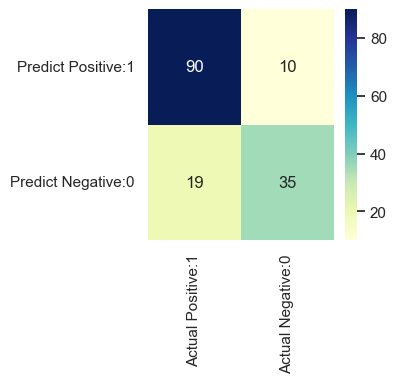

In [47]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

plt.figure(figsize=(3,3))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [48]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       109
           1       0.65      0.78      0.71        45

    accuracy                           0.81       154
   macro avg       0.77      0.80      0.78       154
weighted avg       0.83      0.81      0.82       154



In [49]:
y_score = classifier_regressor.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

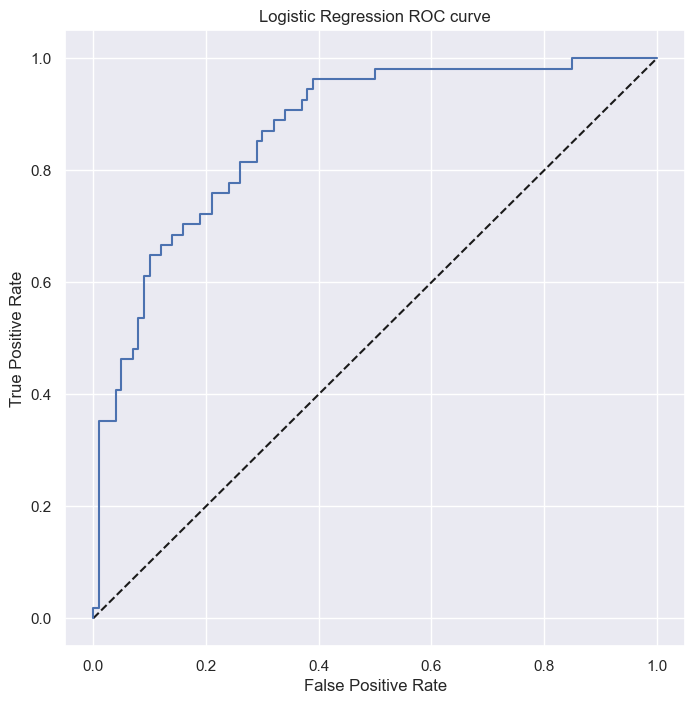

In [50]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

In [51]:
print("The AUC score of Logistic Regression: ",roc_auc_score(y_test,y_score))

The AUC score of Logistic Regression:  0.8677777777777778


### Introduction to k Nearest Neighbours algorithm

In machine learning, k Nearest Neighbours or kNN is the simplest of all machine learning algorithms. It is a non-parametric algorithm used for classification and regression tasks. Non-parametric means there is no assumption required for data distribution. So, kNN does not require any underlying assumption to be made. In both classification and regression tasks, the input consists of the k closest training examples in the feature space. The output depends upon whether kNN is used for classification or regression purposes.

###  k Nearest Neighbours intuition
The kNN algorithm intuition is very simple to understand. It simply calculates the distance between a sample data point and all the other training data points. The distance can be Euclidean distance or Manhattan distance. Then, it selects the k nearest data points where k can be any integer. Finally, it assigns the sample data point to the class to which the majority of the k data points belong

### Advantages :


1. It is significantly faster than other algorithmns such as SVM or Linear Regression. 
2. It is easy to implement
3.  Since KNN doesn't need training period.So,new data can be added seamlessly without impacting the algorithm's accuracy.



### Disadvantages:

1. It doesn't work well with high-dimensional data.
2. It is sensitive to noise in the dataset.
3. Without proper scaling, it may generate incorrect predictions.

In [52]:
np.sqrt(X_train.shape[0])

24.779023386727733

In [53]:
k=24

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [55]:
#Train our model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [56]:
y_pred=knn.predict(X_test)

### Check accuracy score

In [57]:
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

In [58]:
y_pred=knn.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test,y_pred)))

Model accuracy score: 0.7532


### Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [59]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7606


In [60]:
# 2nd method
accuracy=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))
    

In [61]:
len(accuracy)

29

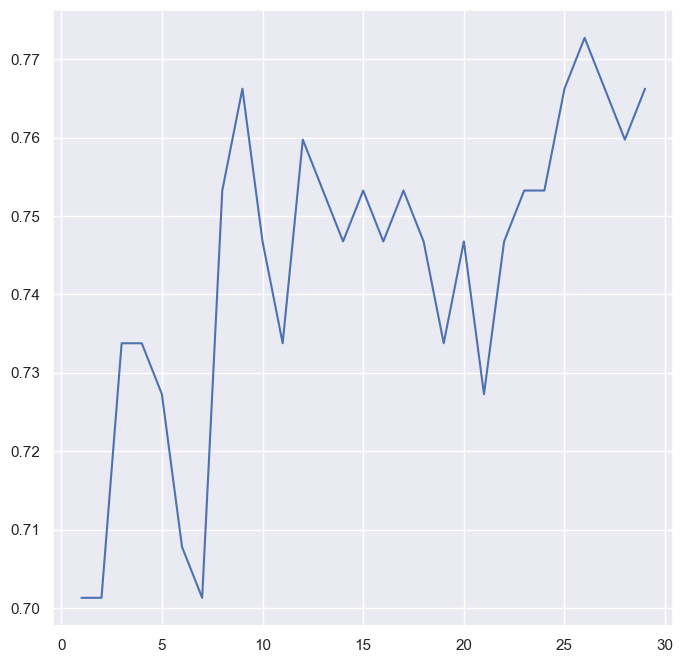

In [62]:
plt.plot(range(1,30),accuracy)

In [63]:
knn=KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=26)

In [64]:
y_pred=knn.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred)

0.7727272727272727

### Confusion Matrix

In [66]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[93  7]
 [28 26]]

True Positives(TP) =  93

True Negatives(TN) =  26

False Positives(FP) =  7

False Negatives(FN) =  28


Visualisation of Confusion Matrix

<Axes: >

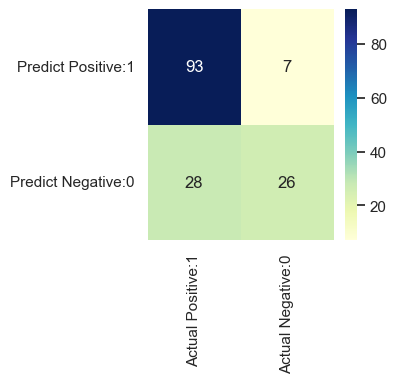

In [67]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

plt.figure(figsize=(3,3))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Check for overfitting and underfitting

In [68]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.7606
Test set score: 0.7727


The training-set accuracy score is 0.7606 while the test-set accuracy to be 0.7727. These two values are quite comparable. So, there is no question of overfitting.

### Classification Report

In [69]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       121
           1       0.48      0.79      0.60        33

    accuracy                           0.77       154
   macro avg       0.71      0.78      0.72       154
weighted avg       0.83      0.77      0.79       154



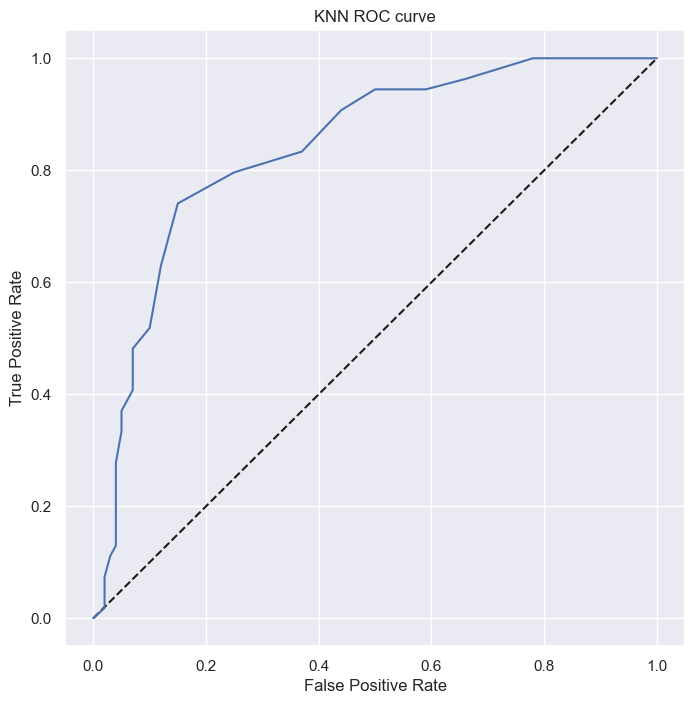

In [70]:
y_score = knn.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC curve')
plt.show()

In [71]:
print("The AUC score of KNN is : ",roc_auc_score(y_test,y_score))

The AUC score of KNN is :  0.8408333333333333


### Decision Tree ###

### Introduction to Decision Tree

Decision Tree is a supervised learning algorithm can be used for performing both regression and classification problems. It is constructed by recursively splitting the training data into subsets based on attribute values until a stopping criterion is met (e.g., maximum tree depth or minimum samples required to split a node).

### Advantages:

1. Decision trees are easy to understand and interpret, can be visually analyzed, and easy to extract rules.
2. Both nominal and numerical data can be processed simultaneously.
3. Ability to handle irrelevant features.
4.  It is more suitable for processing samples with missing attributes.

### Disadvantages:

1. Decision trees tend to overfit the training data, especially when they grow too deep.
2. When dealing with large datasets,their prediction speed can be slower than other algorithms.
3. Small changes in the input data can lead to significant changes in the tree structure.

In [72]:
from sklearn import tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
treemodel1=DecisionTreeClassifier()

In [75]:
treemodel1.fit(X_train,y_train)

DecisionTreeClassifier()

### Observation

This leads to overfitting

### Optimizing Decision Tree (Pre-prunning) ###

Before building decision tree we will decide the hyperparameters. This can overcome the overfitting issue.

In [76]:

parameter={ 'criterion':['gini','entropy','log_loss'],
           'splitter':['best','random'],
           'max_depth':[1,2,3,4,5],
           'max_features':['auto','sqrt','log2'],
           
            
          }

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
cv=GridSearchCV(treemodel1,param_grid=parameter,cv=5,scoring='accuracy')

In [79]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [80]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [121]:
treemodel=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='sqrt',splitter='best')


In [122]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

[Text(0.434375, 0.9166666666666666, 'x[5] <= 29.95\nentropy = 0.933\nsamples = 614\nvalue = [400, 214]'),
 Text(0.18125, 0.75, 'x[5] <= 22.75\nentropy = 0.638\nsamples = 229\nvalue = [192, 37]'),
 Text(0.1, 0.5833333333333334, 'x[5] <= 15.775\nentropy = 0.262\nsamples = 45\nvalue = [43, 2]'),
 Text(0.075, 0.4166666666666667, 'x[3] <= 11.5\nentropy = 0.684\nsamples = 11\nvalue = [9, 2]'),
 Text(0.05, 0.25, 'x[0] <= 7.5\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(0.025, 0.08333333333333333, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.075, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.125, 0.4166666666666667, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.2625, 0.5833333333333334, 'x[6] <= 1.058\nentropy = 0.702\nsamples = 184\nvalue = [149, 35]'),
 Text(0.2, 0.4166666666666667, 'x[2] <= 61.5\nentropy = 0.657\nsamples = 177\nvalue = [147, 30]'),
 Text(0.15, 0.25, '

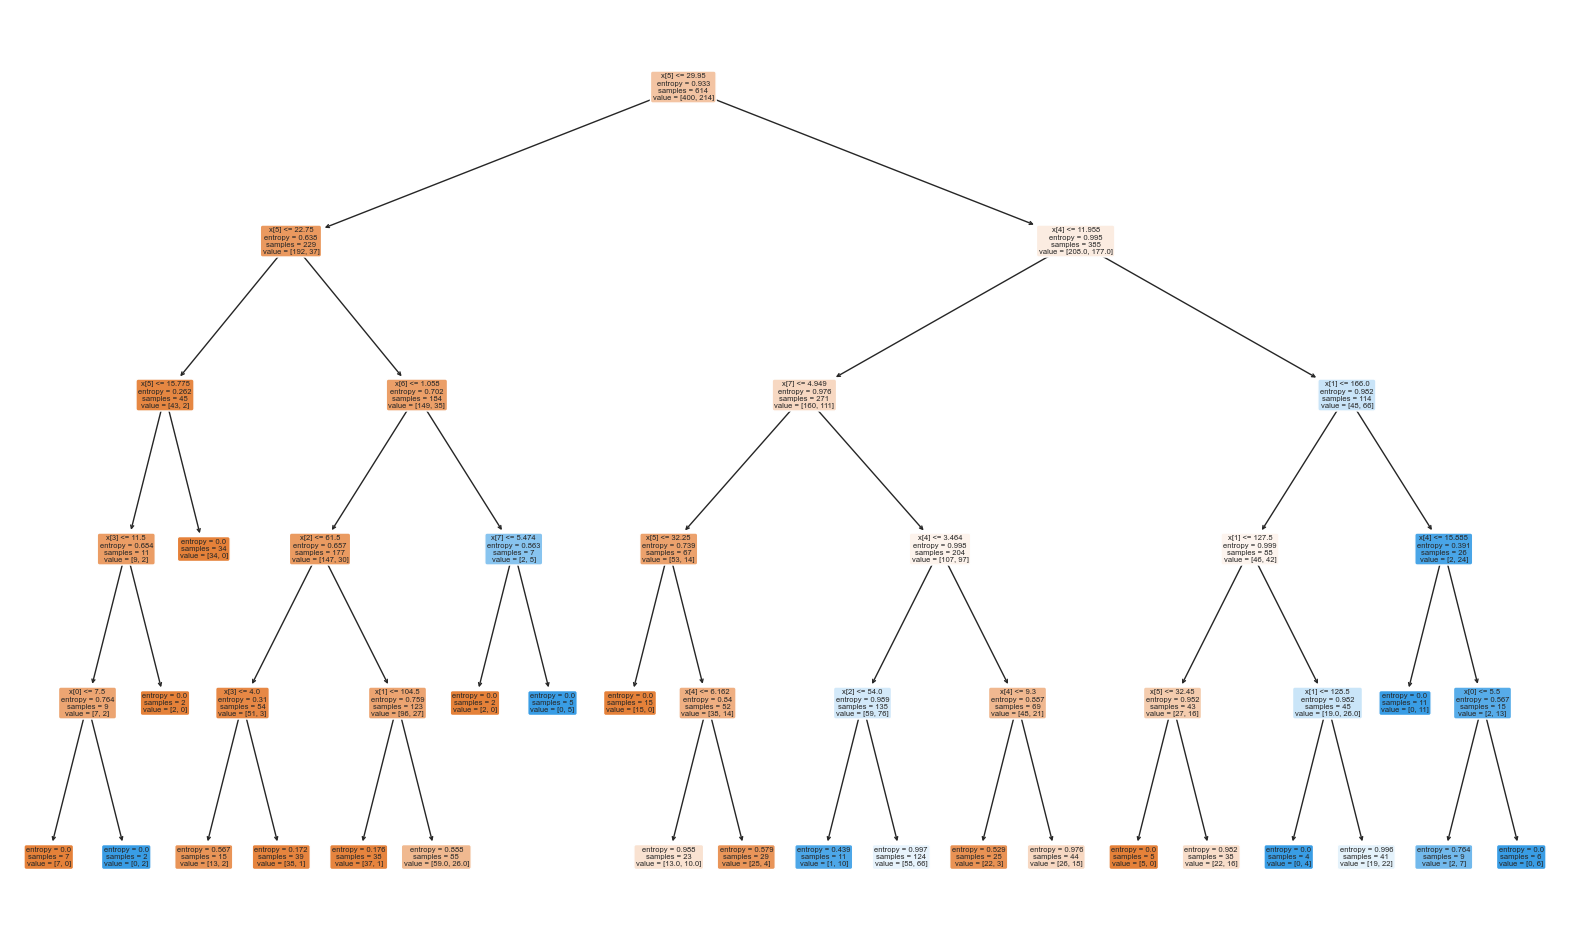

In [123]:
plt.figure(figsize=(20,12))
tree.plot_tree(treemodel,rounded=True,filled=True)

In [124]:
from sklearn.metrics import accuracy_score, classification_report

In [125]:
y_pred2=treemodel.predict(X_test)
accuracy_score(y_test,y_pred)

0.7922077922077922

### Confusion Matrix

In [126]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[92  8]
 [24 30]]

True Positives(TP) =  92

True Negatives(TN) =  30

False Positives(FP) =  8

False Negatives(FN) =  24


Visualisation of Confusion Matrix

<Axes: >

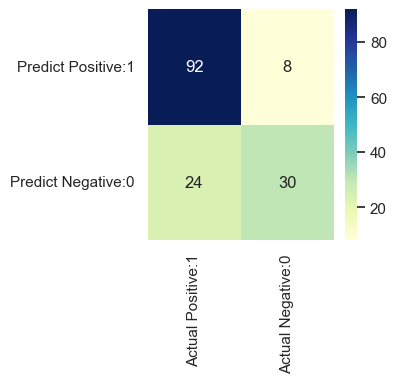

In [127]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

plt.figure(figsize=(3,3))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Report

In [128]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       116
           1       0.56      0.79      0.65        38

    accuracy                           0.79       154
   macro avg       0.74      0.79      0.75       154
weighted avg       0.83      0.79      0.80       154



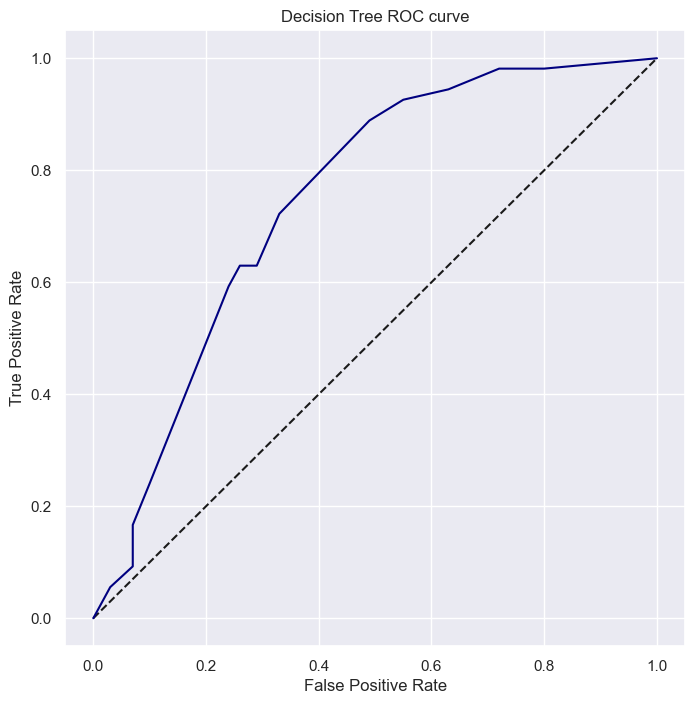

In [129]:
y_score = treemodel.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Decision Tree',color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
plt.show()

In [130]:
print("The AUC score of Decision Tree Classifier is : ",roc_auc_score(y_test,y_score))

The AUC score of Decision Tree Classifier is :  0.7478703703703703


### Naive Bayes ###

### Introduction to Naive Bayes
In machine learning, Naive Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features. Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.

Naïve Bayes models are also known as simple Bayes or independent Bayes. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learni.ng

### Naive Bayes algorithm intuition 

iNaïve Bayes Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the Maximum A Posteriori (MAP).

The MAP for a hypothesis with 2 events A and B is

 = max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))

Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the resultMAP (A)

In [91]:
from sklearn.naive_bayes import GaussianNB

In [92]:
model=GaussianNB()

In [93]:
model.fit(X_train,y_train)

GaussianNB()

In [94]:
y_pred=model.predict(X_test)

### Check Accuracy Score

In [95]:
accuracy_score(y_test,y_pred)

0.7922077922077922

In [96]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[85 15]
 [17 37]]

True Positives(TP) =  85

True Negatives(TN) =  37

False Positives(FP) =  15

False Negatives(FN) =  17


Visualisation of Confusion Matrix

<Axes: >

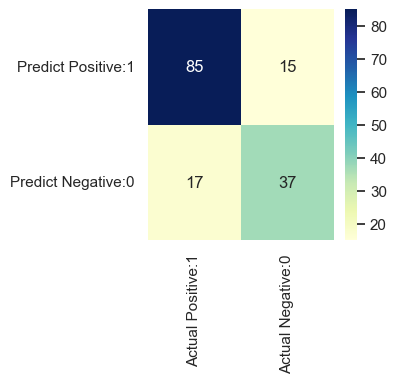

In [97]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

plt.figure(figsize=(3,3))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Report

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       100
           1       0.71      0.69      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



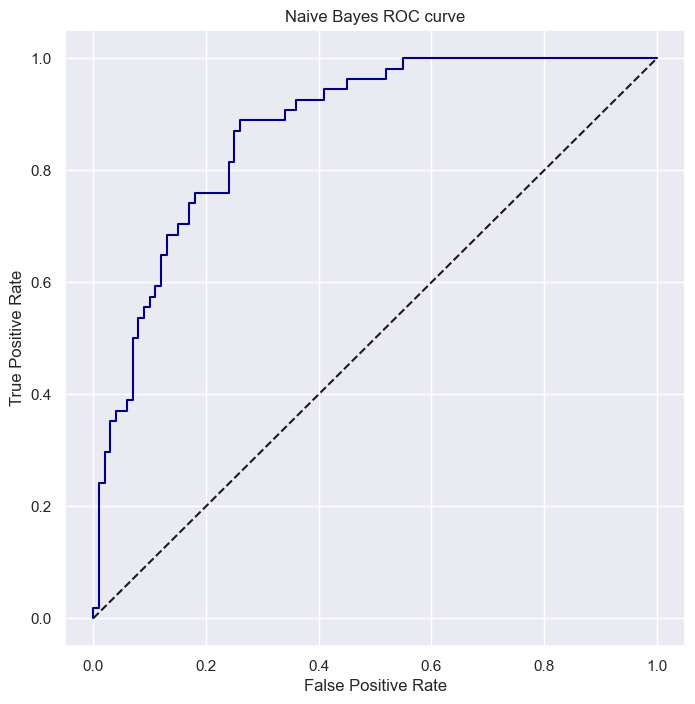

In [99]:
y_score = model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes',color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC curve')
plt.show()

In [100]:
print("The AUC score of Naive Bayes is : ",roc_auc_score(y_test,y_score))

The AUC score of Naive Bayes is :  0.8722222222222222


### Support Vector Machine ###

### What is Support Vector Machine?

Support Vector Machine (SVM) is a machine learning algorithm used for linear or nonlinear classification, regression, and even outlier detection tasks.

### Advantages:

1. SVMs are effective in dealing with High-dimensional data.
2. It is robust to Outliers.
3. It can model Non-Linear decision-boundaries by using kernel trick.

### Disadvantages:


1. The performance of SVMs depends on the choice of kernel.
2. Selecting the right kernel function is crucial for achieving good results.
3. It is computationally expensive.

### SVM with default hyperparameters

In [101]:
from sklearn import svm

### SVM with Linear Kernel

In [102]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)

In [103]:
classifier.fit(X_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [104]:
y_predict=classifier.predict(X_test)

### Checking Accuracy

In [105]:
accuracy_score(y_test,y_predict)

0.8116883116883117

### Classification Report

In [106]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       100
           1       0.77      0.67      0.71        54

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



### SVM with RBF kernel

In [107]:
rbf_classifier=svm.SVC(kernel='rbf')
rbf_classifier.fit(X_train,y_train)

SVC()

In [108]:
y_pred=rbf_classifier.predict(X_test)

In [109]:
accuracy_score(y_test,y_pred)

0.7987012987012987

### SVM with kernal polynomial

In [110]:
poly_classifier = svm.SVC(kernel="poly")
poly_classifier.fit(X_train,y_train)

SVC(kernel='poly')

In [111]:
y_pred = poly_classifier.predict(X_test)

In [112]:
accuracy_score(y_test,y_pred)

0.7922077922077922

### SVM with kernel sigmoid

In [113]:
sigmoid_classifier = svm.SVC(kernel="sigmoid",C=2,gamma='auto')
sigmoid_classifier.fit(X_train,y_train)

SVC(C=2, gamma='auto', kernel='sigmoid')

In [114]:
y_pred = poly_classifier.predict(X_test)

In [115]:
accuracy_score(y_test,y_pred)

0.7922077922077922

### Confusion Matrix

In [116]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[92  8]
 [24 30]]

True Positives(TP) =  92

True Negatives(TN) =  30

False Positives(FP) =  8

False Negatives(FN) =  24


Visualisation of Confusion Matrix

<Axes: >

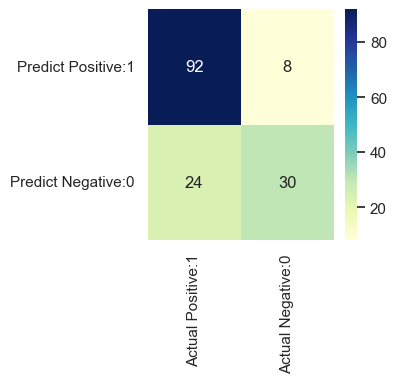

In [117]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

plt.figure(figsize=(3,3))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Report

In [118]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       100
           1       0.77      0.67      0.71        54

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



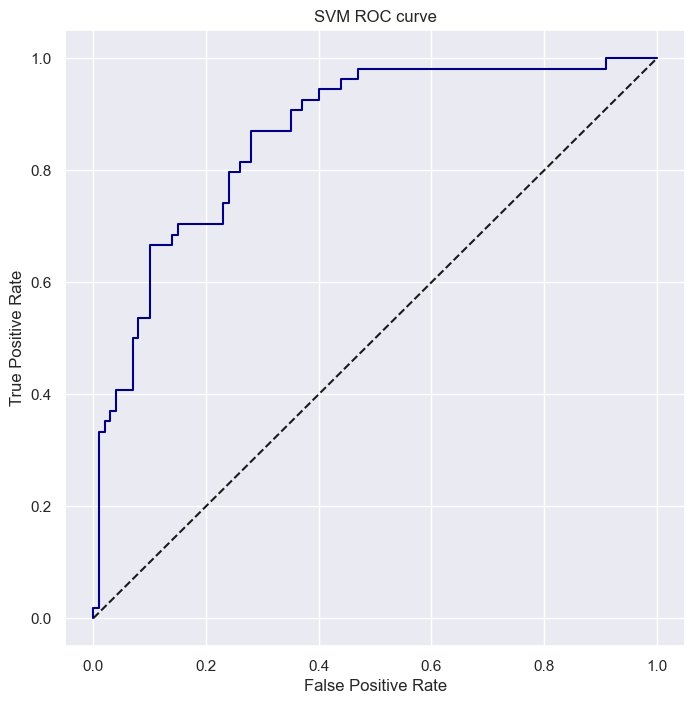

In [119]:
y_score = classifier.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM',color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC curve')
plt.show()

In [120]:
print("The AUC score of SVM: ",roc_auc_score(y_test,y_score))

The AUC score of SVM:  0.8635185185185186


### Results and Conclusion
### Logistic regression: 
The logistic regression model accuracy score is 0.81168.

 The model shows no signs of overfitting.
### KNN Classifier
 The model yields very good performance as indicated by the model accuracy which was found to be 0.7922 with k=26.
 ### Decesion Tree
 The decesion tree model accuracy is 0.79 after optimizing.
 ### Naive Bayes
 The model accuracy is 0.7922.
 ### Support Vector Machine
 We got maximum accuracy with linear kernel with C=2 and the accuracy is 0.81.